# Visualize POIs

1. normalized POI counts and entropy might be more reasonable?

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
# import geoplot
# import geoplot.crs as gcrs

In [19]:
import pickle

In [20]:
# mount_path = "/mnt/c/Users/jason/Dropbox (MIT)/"
mount_path = "/Users/shenhaowang/Dropbox (MIT)/project_econ_opportunity_south_Australia/"


In [21]:
# read files
# poi
# poi = gpd.read_file(mount_path + "/SA data/dataSA/points/points.shp")
poi = gpd.read_file(mount_path + "/SA data/dataSA/points/points.shp")

# read spatial files
sa2_adelaide = gpd.read_file('../../data/processed_small_data/shapefiles/sa2_adelaide.shp')


In [22]:
# node degree entropy
with open('../../data/processed_small_data/node_degree_entropy_df.pickle', 'rb') as f:
    node_degree_entropy_df = pickle.load(f) # this is a file processed from POI_df


In [23]:
# proj
sa2_adelaide_proj = sa2_adelaide.to_crs("epsg:3112")
poi_proj = poi.to_crs("epsg:3112")


In [24]:
node_degree_entropy_df.head()

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,...,num_4degree,num_greater5degree,poi_count,poi_count_entropy,poi_count_area,poi_count_entropy_area,poi_count_by_area,poi_count_by_entropy_area,poi_count_div_by_area,poi_count_entropy_div_by_area
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,276,11,643,1.550264,61.693702,0.148743,61.693702,0.148743,61.693702,0.148743
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,69,6,113,1.506143,22.326857,0.297588,22.326857,0.297588,22.326857,0.297588
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,141,6,42,1.453478,0.115969,0.004013,0.115969,0.004013,0.115969,0.004013
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,110,7,124,1.963282,1.063360,0.016836,1.063360,0.016836,1.063360,0.016836
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,36,1,50,1.488217,0.456135,0.013577,0.456135,0.013577,0.456135,0.013577


In [25]:
sa2_adelaide.head()

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,10.4824,"POLYGON ((138.58096 -34.93024, 138.58094 -34.9..."
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,5.0909,"POLYGON ((138.58214 -34.90424, 138.58287 -34.9..."
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,364.4390,"POLYGON ((138.75610 -34.82107, 138.75567 -34.8..."
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,117.2141,"POLYGON ((138.69440 -34.98807, 138.69514 -34.9..."
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,110.1516,"POLYGON ((138.78877 -35.02474, 138.78889 -35.0..."


## POIs 

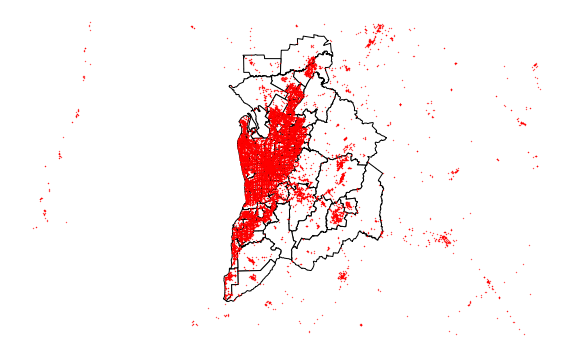

In [26]:
ax = sa2_adelaide_proj.plot(edgecolor='k', facecolor='w', figsize = (10,10))
poi_proj.plot(ax = ax, facecolor='r', markersize = 0.1)
ax.set_axis_off()


## POI Indicators

In [27]:
sa2_adelaide_proj = sa2_adelaide_proj.merge(node_degree_entropy_df[['poi_count','poi_count_entropy','poi_count_div_by_area', 'poi_count_entropy_div_by_area','SA2_MAIN16']], left_on='SA2_MAIN16', right_on='SA2_MAIN16', how='outer')


In [28]:
sa2_adelaide_proj


,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,poi_count,poi_count_entropy,poi_count_div_by_area,poi_count_entropy_div_by_area
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,10.4824,"POLYGON ((417263.891 -3939518.653, 417262.345 ...",643.0,1.550264,61.693702,0.148743
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,5.0909,"POLYGON ((417476.199 -3936647.849, 417544.905 ...",113.0,1.506143,22.326857,0.297588
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,364.4390,"POLYGON ((433666.133 -3928044.498, 433628.032 ...",42.0,1.453478,0.115969,0.004013
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,117.2141,"POLYGON ((427353.316 -3946292.628, 427421.744 ...",124.0,1.963282,1.063360,0.016836
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,110.1516,"POLYGON ((435785.372 -3950672.079, 435799.037 ...",50.0,1.488217,0.456135,0.013577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,404031105,41105,Fulham,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,1.3212,"POLYGON ((410502.489 -3938804.420, 410496.375 ...",9.0,1.303092,6.851511,0.992017
106,404031106,41106,Lockleys,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,5.7020,"POLYGON ((411842.413 -3938239.458, 411857.841 ...",18.0,1.581094,3.174781,0.278868
107,404031107,41107,Plympton,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,10.6969,"POLYGON ((413778.862 -3941759.801, 413777.655 ...",38.0,1.495968,3.572091,0.140625
108,404031108,41108,Richmond (SA),40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,8.9253,"POLYGON ((414829.341 -3937727.856, 414828.056 ...",57.0,1.682331,6.422553,0.189559


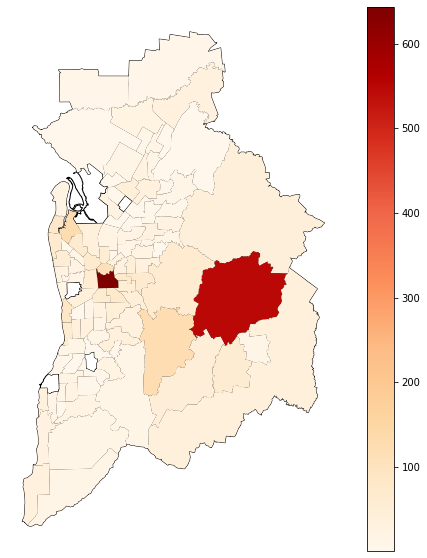

In [29]:
ax = sa2_adelaide_proj.plot(edgecolor='k', facecolor='w', figsize = (10,10))
sa2_adelaide_proj.plot(ax = ax, column = 'poi_count', cmap='OrRd', legend=True)
ax.set_axis_off()


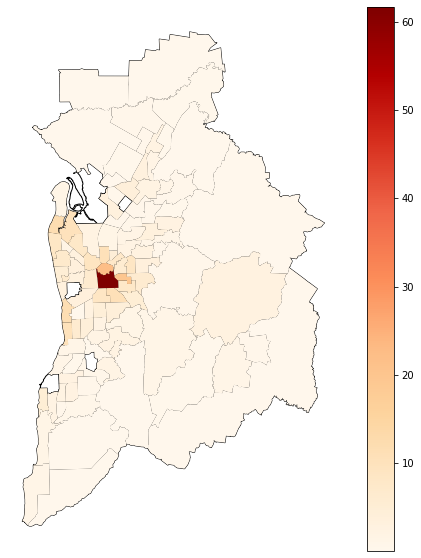

In [30]:
ax = sa2_adelaide_proj.plot(edgecolor='k', facecolor='w', figsize = (10,10))
sa2_adelaide_proj.plot(ax = ax, column = 'poi_count_div_by_area', cmap='OrRd', legend=True)
ax.set_axis_off()

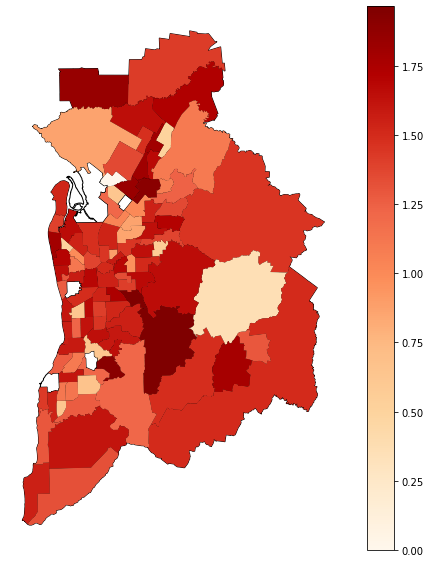

In [31]:
ax = sa2_adelaide_proj.plot(edgecolor='k', facecolor='w', figsize = (10,10))
sa2_adelaide_proj.plot(ax = ax, column = 'poi_count_entropy', cmap='OrRd', legend=True)
ax.set_axis_off()

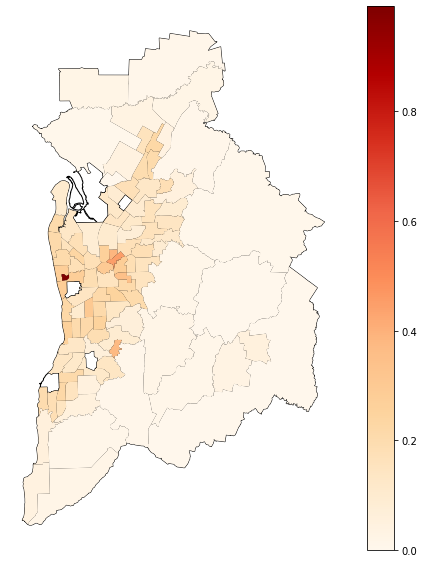

In [33]:
ax = sa2_adelaide_proj.plot(edgecolor='k', facecolor='w', figsize = (10,10))
sa2_adelaide_proj.plot(ax = ax, column = 'poi_count_entropy_div_by_area', cmap='OrRd', legend=True)
ax.set_axis_off()


In [35]:
sa2_adelaide_proj.loc[sa2_adelaide_proj.SA2_MAIN16.isin(['401011001','401021004','401021008']), 'poi_count_entropy_div_by_area']


0    0.148743
3    0.016836
7    0.003819
Name: poi_count_entropy_div_by_area, dtype: float64

In [20]:
sa2_adelaide_proj

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,poi_count,poi_count_entropy
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,10.4824,"POLYGON ((417263.891 -3939518.653, 417262.345 ...",3257.0,2.427557
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,5.0909,"POLYGON ((417476.199 -3936647.849, 417544.905 ...",754.0,2.215282
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,364.4390,"POLYGON ((433666.133 -3928044.498, 433628.032 ...",102.0,2.046214
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,117.2141,"POLYGON ((427353.316 -3946292.628, 427421.744 ...",373.0,2.691587
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,110.1516,"POLYGON ((435785.372 -3950672.079, 435799.037 ...",95.0,2.378202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,404031105,41105,Fulham,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,1.3212,"POLYGON ((410502.489 -3938804.420, 410496.375 ...",44.0,2.139979
106,404031106,41106,Lockleys,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,5.7020,"POLYGON ((411842.413 -3938239.458, 411857.841 ...",129.0,1.991836
107,404031107,41107,Plympton,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,10.6969,"POLYGON ((413778.862 -3941759.801, 413777.655 ...",348.0,1.947474
108,404031108,41108,Richmond (SA),40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,8.9253,"POLYGON ((414829.341 -3937727.856, 414828.056 ...",332.0,2.315824
